In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


klaksvik fo
hithadhoo mv
bambous virieux mu
kavieng pg
lyuban by
nikolskoye ru
rikitea pf
bolungarvik is
saint-philippe re
hamilton bm
castro cl
ushuaia ar
avarua ck
lerwick gb
albany au
albany au
puerto ayora ec
busselton au
kamenka ru
asyut eg
vaitupu wf
east london za
jamestown sh
hobart au
ushuaia ar
bluff nz
albany au
hobart au
kapaa us
puerto ayora ec
alofi nu
cherskiy ru
busselton au
vila velha br
hilo us
angoram pg
guerrero negro mx
ataco co
harwich us
hamilton bm
puerto carreno co
nizhneyansk ru
souillac mu
punta arenas cl
bilibino ru
margate za
busselton au
znamenskoye ru
pevek ru
saint-philippe re
naze jp
bengkulu id
atuona pf
nizhneyansk ru
nanortalik gl
jamestown sh
katsuura jp
khatanga ru
hendaye fr
olinda br
othonoi gr
jamestown sh
port alfred za
busselton au
hermanus za
mataura pf
punta arenas cl
fairbanks us
ushuaia ar
san cristobal ec
sungaipenuh id
mar del plata ar
yellowknife ca
torbay ca
sitka us
hobart au
belushya guba ru
east london za
punta arenas cl
sao gabriel

ushuaia ar
lorengau pg
punta arenas cl
chokurdakh ru
saskylakh ru
vestmannaeyjar is
hermanus za
tatsinskaya ru
leshukonskoye ru
avarua ck
hunza pk
rikitea pf
avarua ck
tsihombe mg
jamestown sh
namibe ao
chuy uy
los zacatones mx
zabol ir
kapaa us
albany au
herat af
tonantins br
luderitz na
chimbote pe
grand river south east mu
leningradskiy ru
albany au
rikitea pf
uchiza pe
port alfred za
aklavik ca
superior us
puerto ayora ec
manakara mg
tuktoyaktuk ca
butaritari ki
vaitupu wf
provideniya ru
tasiilaq gl
ushuaia ar
camacha pt
parkes au
ushuaia ar
port lavaca us
ushuaia ar
provideniya ru
kingisepp ru
cherskiy ru
east london za
nizhneyansk ru
saskylakh ru
rikitea pf
muros es
hermanus za
tra vinh vn
new norfolk au
killybegs ie
kapaa us
east london za
vanimo pg
new norfolk au
fuerte olimpo py
rikitea pf
yellowknife ca
ushuaia ar
biasca ch
manacapuru br
rikitea pf
vaini to
karratha au
villa guerrero mx
avarua ck
bethel us
mahebourg mu
wattegama lk
belaya gora ru
butaritari ki
victoria sc
lin

coquimbo cl
ushuaia ar
mataura pf
ponta do sol cv
trincomalee lk
cape town za
montepuez mz
barrow us
busselton au
new norfolk au
bluff nz
malwan in
puerto ayora ec
vaini to
busselton au
castro cl
cape town za
tasiilaq gl
illoqqortoormiut gl
liuzhou cn
pevek ru
sao filipe cv
georgetown sh
yurga ru
geraldton au
yellowknife ca
formosa do rio preto br
vaitupu wf
waw sd
aksum et
margate za
ushuaia ar
los llanos de aridane es
hilo us
shingu jp
georgetown sh
belushya guba ru
bintulu my
eyl so
bluff nz
novopavlovka ru
hasaki jp
northam au
new norfolk au
rikitea pf
punta arenas cl
berezovyy ru
tazmalt dz
tasiilaq gl
hithadhoo mv
mehamn no
taolanaro mg
hihifo to
rawannawi ki
airai pw
hermanus za
wamba cd
afsin tr
port hedland au
bredasdorp za
blagodatnoye ru
kapaa us


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


611

In [9]:
import requests
requests.__version__


'2.24.0'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#city_url = url + "&q="
# Import the datetime module from the datetime library.
from datetime import datetime


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"


Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 12 of Set 25 | klaksvik
Processing Record 13 of Set 25 | hithadhoo
Processing Record 14 of Set 25 | bambous virieux
Processing Record 15 of Set 25 | kavieng
Processing Record 16 of Set 25 | lyuban
Processing Record 17 of Set 25 | nikolskoye
Processing Record 18 of Set 25 | rikitea
Processing Record 19 of Set 25 | bolungarvik
City not found. Skipping...
Processing Record 20 of Set 25 | saint-philippe
Processing Record 21 of Set 25 | hamilton
Processing Record 22 of Set 25 | castro
Processing Record 23 of Set 25 | ushuaia
Processing Record 24 of Set 25 | avarua
Processing Record 25 of Set 25 | lerwick
Processing Record 26 of Set 25 | albany
Processing Record 27 of Set 25 | puerto ayora
Processing Record 28 of Set 25 | busselton
Processing Record 29 of Set 25 | kamenka
Processing Record 30 of Set 25 | asyut
Processing Record 31 of Set 25 | vaitupu
City not found. Skipping...
Processing Record 32 of Set 25 | east london
Processing Record 33 of Set 25 | jamestown
Processin

Processing Record 36 of Set 28 | asau
Processing Record 37 of Set 28 | tupik
Processing Record 38 of Set 28 | ahipara
Processing Record 39 of Set 28 | syracuse
Processing Record 40 of Set 28 | acu
Processing Record 41 of Set 28 | ust-kamchatsk
City not found. Skipping...
Processing Record 42 of Set 28 | mattru
Processing Record 43 of Set 28 | tual
Processing Record 44 of Set 28 | omboue
Processing Record 45 of Set 28 | puksoozero
Processing Record 46 of Set 28 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 28 | yirol
City not found. Skipping...
Processing Record 48 of Set 28 | codrington
Processing Record 49 of Set 28 | hasaki
Processing Record 50 of Set 28 | faanui
Processing Record 1 of Set 29 | aklavik
Processing Record 2 of Set 29 | cerrito
Processing Record 3 of Set 29 | kodiak
Processing Record 4 of Set 29 | lebu
Processing Record 5 of Set 29 | tessalit
Processing Record 6 of Set 29 | olafsvik
Processing Record 7 of Set 29 | shingu
Processing Record 8 of Se

Processing Record 16 of Set 32 | diglur
Processing Record 17 of Set 32 | solovetskiy
City not found. Skipping...
Processing Record 18 of Set 32 | airai
Processing Record 19 of Set 32 | keti bandar
Processing Record 20 of Set 32 | ishigaki
Processing Record 21 of Set 32 | nantucket
Processing Record 22 of Set 32 | morant bay
Processing Record 23 of Set 32 | bandar-e lengeh
Processing Record 24 of Set 32 | cockburn town
Processing Record 25 of Set 32 | grenfell
Processing Record 26 of Set 32 | tabuk
Processing Record 27 of Set 32 | mersing
Processing Record 28 of Set 32 | bolshaya martynovka
Processing Record 29 of Set 32 | ancud
Processing Record 30 of Set 32 | yining
Processing Record 31 of Set 32 | lashio
Processing Record 32 of Set 32 | kearney
Processing Record 33 of Set 32 | dembi dolo
Processing Record 34 of Set 32 | heinsberg
Processing Record 35 of Set 32 | dzhusaly
City not found. Skipping...
Processing Record 36 of Set 32 | hihifo
City not found. Skipping...
Processing Record 

Processing Record 49 of Set 35 | luganville
Processing Record 50 of Set 35 | miri
Processing Record 1 of Set 36 | almaznyy
Processing Record 2 of Set 36 | liberal
Processing Record 3 of Set 36 | awjilah
Processing Record 4 of Set 36 | corinto
Processing Record 5 of Set 36 | buraydah
Processing Record 6 of Set 36 | batagay
Processing Record 7 of Set 36 | grand junction
Processing Record 8 of Set 36 | husavik
Processing Record 9 of Set 36 | moree
Processing Record 10 of Set 36 | orotina
Processing Record 11 of Set 36 | nioro
Processing Record 12 of Set 36 | lasa
Processing Record 13 of Set 36 | conil
Processing Record 14 of Set 36 | hachinohe
Processing Record 15 of Set 36 | san jose
Processing Record 16 of Set 36 | etchoropo
Processing Record 17 of Set 36 | shakhtinsk
Processing Record 18 of Set 36 | radzyn podlaski
Processing Record 19 of Set 36 | kirakira
Processing Record 20 of Set 36 | mirnyy
Processing Record 21 of Set 36 | green river
Processing Record 22 of Set 36 | coquimbo
Proc

In [17]:
len(city_data)

554

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.23,-6.59,50.00,93,100,4.70,FO,2020-10-04 17:49:31
1,Hithadhoo,-0.60,73.08,82.44,75,92,6.44,MV,2020-10-04 17:49:32
2,Bambous Virieux,-20.34,57.76,75.00,88,40,8.05,MU,2020-10-04 17:49:32
3,Kavieng,-2.57,150.80,83.05,77,93,14.36,PG,2020-10-04 17:49:32
4,Lyuban,52.80,28.00,64.40,66,99,16.46,BY,2020-10-04 17:49:32
5,Nikolskoye,59.70,30.79,52.00,81,40,11.18,RU,2020-10-04 17:49:33
6,Rikitea,-23.12,-134.97,73.38,76,2,16.13,PF,2020-10-04 17:46:54
7,Saint-Philippe,-21.36,55.77,71.60,78,90,11.41,RE,2020-10-04 17:49:33
8,Hamilton,39.18,-84.53,69.80,46,40,12.75,US,2020-10-04 17:49:34
9,Castro,-24.79,-50.01,77.79,55,18,10.54,BR,2020-10-04 17:49:34


In [19]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2020-10-04 17:49:31,62.23,-6.59,50.00,93,100,4.70
1,Hithadhoo,MV,2020-10-04 17:49:32,-0.60,73.08,82.44,75,92,6.44
2,Bambous Virieux,MU,2020-10-04 17:49:32,-20.34,57.76,75.00,88,40,8.05
3,Kavieng,PG,2020-10-04 17:49:32,-2.57,150.80,83.05,77,93,14.36
4,Lyuban,BY,2020-10-04 17:49:32,52.80,28.00,64.40,66,99,16.46
5,Nikolskoye,RU,2020-10-04 17:49:33,59.70,30.79,52.00,81,40,11.18
6,Rikitea,PF,2020-10-04 17:46:54,-23.12,-134.97,73.38,76,2,16.13
7,Saint-Philippe,RE,2020-10-04 17:49:33,-21.36,55.77,71.60,78,90,11.41
8,Hamilton,US,2020-10-04 17:49:34,39.18,-84.53,69.80,46,40,12.75
9,Castro,BR,2020-10-04 17:49:34,-24.79,-50.01,77.79,55,18,10.54


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today


'10/04/20'

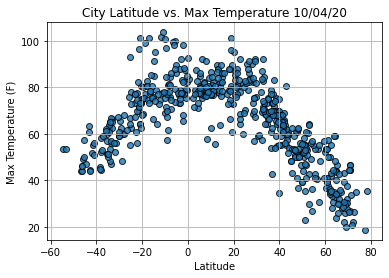

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


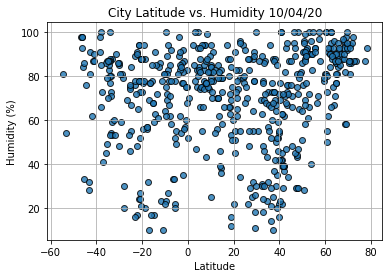

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


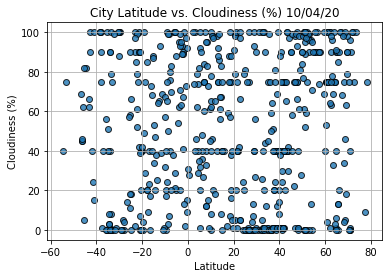

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


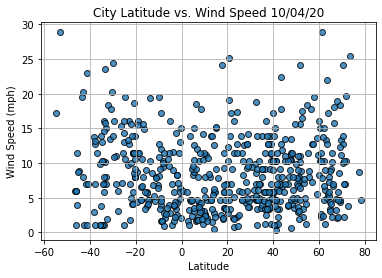

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
